In [1]:
from mnms.generation.roads import generate_manhattan_road

# Graph
road_db = generate_manhattan_road(3, 1000)

In [4]:
from mnms.mobility_service.vehicle_sharing import OnVehicleSharingMobilityService
from mnms.graph.layers import MultiLayerGraph, SharedVehicleLayer
from mnms.vehicles.veh_type import Bike

# Vehicle sharing mobility service
velov = OnVehicleSharingMobilityService("velov", 0)

velov_layer = SharedVehicleLayer(road_db, 'velov_layer', Bike, 3, services=[velov])


In [19]:
# OD layer

from mnms.generation.layers import generate_layer_from_roads, generate_grid_origin_destination_layer
odlayer = generate_grid_origin_destination_layer(-1000, -1000, 3000, 3000, 5, 5)

In [20]:
# Multilayer graph
mlgraph = MultiLayerGraph([velov_layer],odlayer)

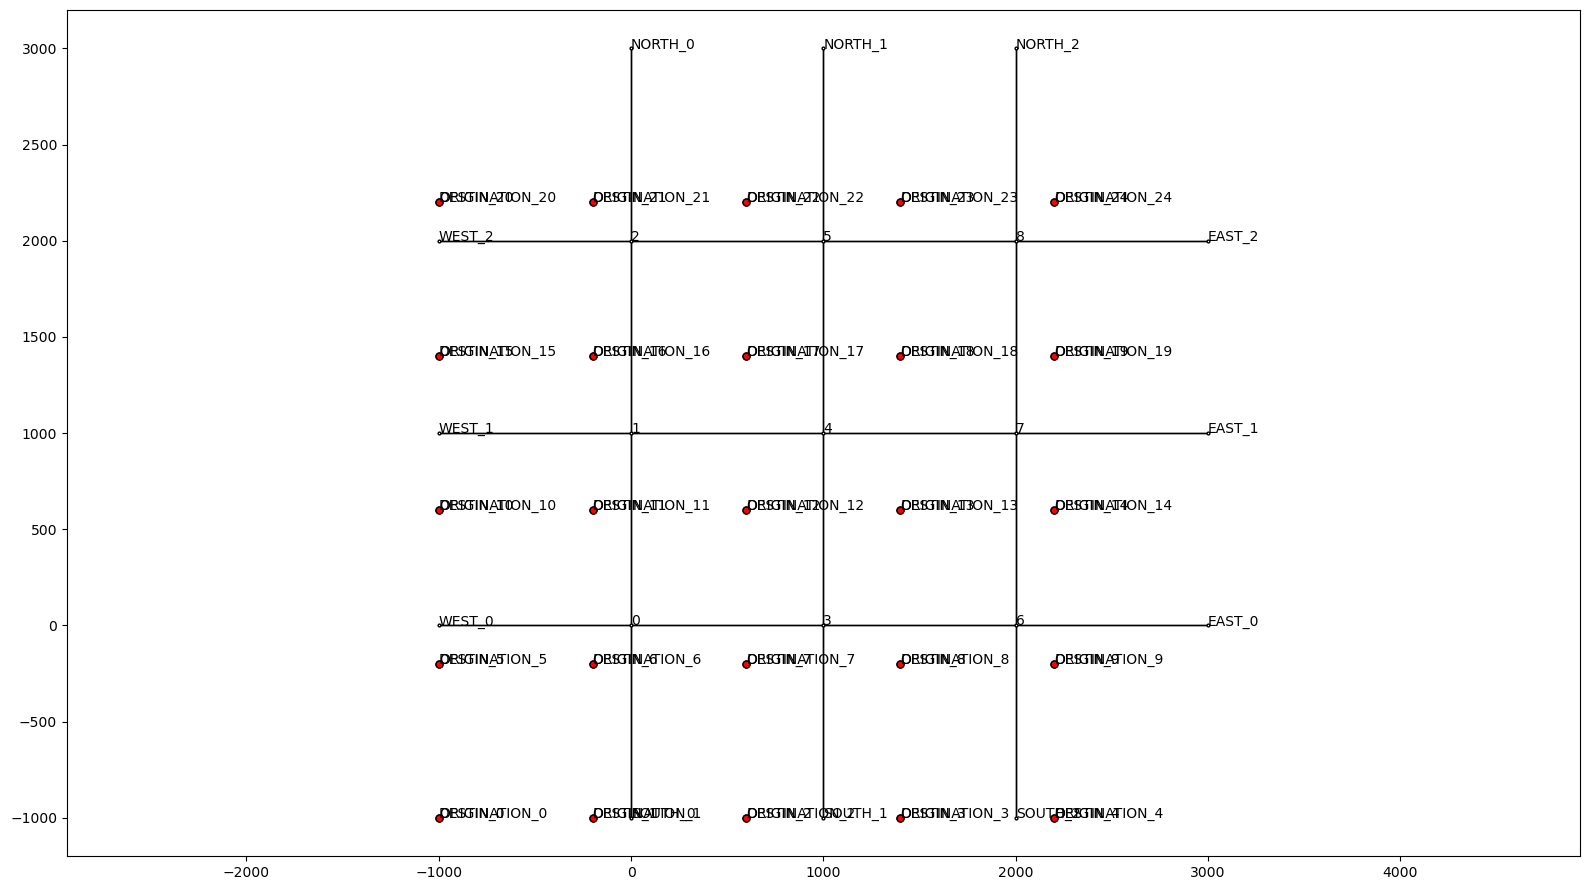

In [21]:
import matplotlib.pyplot as plt
from mnms.tools.render import draw_roads, draw_line,draw_odlayer

fig, ax = plt.subplots(figsize=(16, 9))
draw_roads(ax,mlgraph.roads,label_size=10)
draw_odlayer(ax, mlgraph,color='red',nodesize=5,label_size=10)